In [2]:
import nltk

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpin

In [4]:
messages = [line.rstrip() for line in open('../Dataset/SMSSpamCollection')]

In [6]:
print(len(messages))

5574


In [10]:
for mes_no, message in enumerate(messages[:10]):
    print(mes_no)
    print(message)

0
ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1
ham	Ok lar... Joking wif u oni...
2
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3
ham	U dun say so early hor... U c already then say...
4
ham	Nah I don't think he goes to usf, he lives around here though
5
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6
ham	Even my brother is not like to speak with me. They treat me like aids patent.
7
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8
spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [11]:
import pandas as pd

In [12]:
messages = pd.read_csv('../Dataset/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [13]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
import seaborn as sns
import matplotlib as plt

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

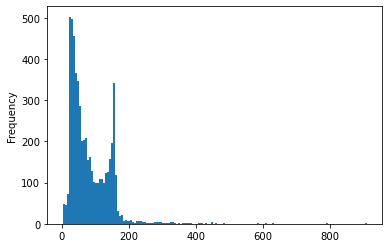

In [21]:
messages['length'].plot.hist(bins=150)

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

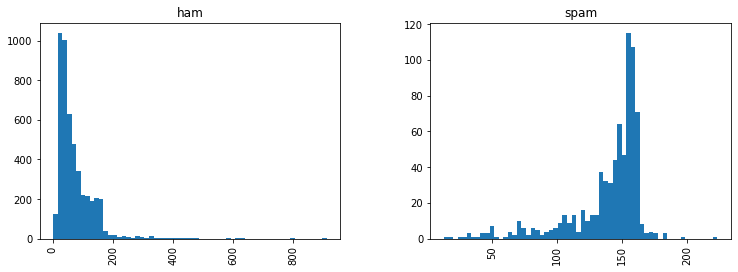

In [22]:
messages.hist(column='length', by='label', bins=60, figsize=(12, 4))

In [23]:
import string

In [29]:
mess = 'Sample message! Notice: it has punctuation'
nopunc = [c for c in mess if c not in string.punctuation]
nopunc = ''.join(nopunc)
print(nopunc)

Sample message Notice it has punctuation


In [25]:
from nltk.corpus import stopwords

In [26]:
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [33]:
clean_mess = [w for w in nopunc.split() if w.lower() not in stopwords.words('English')]

In [35]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [37]:
def text_preprocess(mess):
    nopunc = [c for c in mess if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [w for w in nopunc.split() if w.lower() not in stopwords.words('English')]

In [39]:
messages['message'].head(5).apply(text_preprocess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
bow_transformer = CountVectorizer(analyzer=text_preprocess).fit(messages['message'])

In [43]:
print(len(bow_transformer.vocabulary_))

11425


In [45]:
mess0 = messages['message'][0]
print(mess0)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [46]:
bow0 = bow_transformer.transform([mess0])
print(bow0)

  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1


In [47]:
bow_transformer.get_feature_names()[1110]

'Available'

In [57]:
messages_bow = bow_transformer.transform(messages['message'])

In [64]:
print('Shape of Sparse Matrix', messages_bow.shape)

Shape of Sparse Matrix (5572, 11425)


In [78]:
from sklearn.feature_extraction.text import TfidfTransformer

In [86]:
tfidf_transformer = TfidfTransformer().fit(X=messages_bow)

In [88]:
tfidf0 = tfidf_transformer.transform(bow0)
print(tfidf0)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418


In [91]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['get']]

3.8667870136922557

In [93]:
messages_tfidf = tfidf_transformer.transform(message_bows)

In [94]:
from sklearn.naive_bayes import MultinomialNB

In [97]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [101]:
spam_detect_model.predict(tfidf0)[0] == messages['label'][0]

True

In [102]:
from sklearn.model_selection import train_test_split

In [105]:
ms_train, ms_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [107]:
from sklearn.pipeline import Pipeline

In [108]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocess)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [109]:
pipeline.fit(ms_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocess at 0x000001AC1AEF7430>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [110]:
predictions = pipeline.predict(ms_test)

In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1460
        spam       1.00      0.66      0.80       212

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.89      1672
weighted avg       0.96      0.96      0.95      1672

